# 0. Useful libraries

In [1]:
from imports import *
from src import *

# 1. Explore dataset

In [2]:
df = pd.read_csv(r'C:\Users\johnn\Chronic-kidney-disease---Binary-Classification\dataset\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## 1.1. The target

In [4]:
print(f"The target contains {df['classification'].nunique()} unique elements, which are {df['classification'].unique().tolist()}")

The target contains 3 unique elements, which are ['ckd', 'ckd\t', 'notckd']


The target does not have missing value, but must be cleaned of 'ckd\t'.

## 1.2. The numerical columns

In [5]:
numerical_df = df.select_dtypes(['float64', 'int64'])
numerical_df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [6]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   bgr     356 non-null    float64
 7   bu      381 non-null    float64
 8   sc      383 non-null    float64
 9   sod     313 non-null    float64
 10  pot     312 non-null    float64
 11  hemo    348 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 37.6 KB


- Some numerical columns have missing values, so they must be imputed.
- The values of numerical column are not on the same scale, so they must be normalized.

## 1.3. Categorical columns

In [7]:
categorical_df = df.select_dtypes('object')
categorical_df.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rbc             248 non-null    object
 1   pc              335 non-null    object
 2   pcc             396 non-null    object
 3   ba              396 non-null    object
 4   pcv             330 non-null    object
 5   wc              295 non-null    object
 6   rc              270 non-null    object
 7   htn             398 non-null    object
 8   dm              398 non-null    object
 9   cad             398 non-null    object
 10  appet           399 non-null    object
 11  pe              399 non-null    object
 12  ane             399 non-null    object
 13  classification  400 non-null    object
dtypes: object(14)
memory usage: 43.9+ KB


In [9]:
categorical_df.nunique()

rbc                2
pc                 2
pcc                2
ba                 2
pcv               44
wc                92
rc                49
htn                2
dm                 5
cad                3
appet              2
pe                 2
ane                2
classification     3
dtype: int64

- Some categorical columns have missing values, so they must be imputed.
- Three categorical columns ('pcv', 'wc' and 'rc') contain numerical values, so they were misclassified.
- Encoding will be performed on actual categorical features.

# 2. Clean dataset

In [10]:
cleaned_df = cleaning(df)
cleaned_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

# 3. Preprocess dataset

In [12]:
y = cleaned_df['classification']
X = cleaned_df.drop('classification', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
# CHOOSE PARAMETERS
numerical_strategy = StandardScaler() #  MinMaxScaler() or StandardScaler()
categorical_strategy = OrdinalEncoder() #  OneHotEncoder() or OrdinalEncoder()

preprocessing = FeaturesPreprocessing(numerical_strategy=numerical_strategy, categorical_strategy=categorical_strategy)
preprocessing.fit(X_train)
X_train_transformed = preprocessing.transform(X_train)
X_train_transformed

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
361,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-1.030700e+00,-0.820675,-4.269290e-01,4.469945e-02,-0.381833,4.330231e-01,1.829415,-1.148575e+00,1.337562
373,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-2.256147e-01,-0.400811,-3.779490e-01,4.556916e-01,-0.349898,4.330231e-01,0.988958,3.536010e-01,0.273479
20,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.465143,2.855507e-01,1.698510,9.552440e-02,-2.635447e-01,0.161064,-1.754225e+00,-1.772542,3.536010e-01,-1.736455
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-6.473262e-01,-0.095455,3.377185e+00,-3.448734e+00,-0.222158,-4.088071e-02,-0.331759,-7.190638e-16,0.000000
113,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.362439,3.632049e-16,0.000000,7.250498e-17,2.920275e-15,0.000000,6.475556e-16,0.000000,5.907867e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-2.511730e-01,-0.935184,-4.595824e-01,8.666838e-01,0.097194,7.246562e-01,0.268567,9.465653e-01,0.509942
54,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.362439,3.632049e-16,0.000000,1.389105e-02,-1.607967e-01,-0.158287,1.778441e-01,0.148502,5.907867e-01,-0.554141
93,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.362439,1.844605e+00,0.591595,3.730778e-01,2.501955e-01,-0.573444,-1.207413e+00,-1.052151,-5.160799e-01,-1.736455
226,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.362439,1.577593e-01,-0.095455,6.343045e-01,2.501955e-01,-0.030547,-1.681317e+00,-1.532412,-3.184252e-01,-1.499992


In [14]:
X_test_transformed = preprocessing.transform(X_test)
X_test_transformed

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
182,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.251173,-0.687082,-0.410602,2.501955e-01,-0.190222,-4.418763e-01,-0.451824,-7.190638e-16,0.000000
262,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.417302,-0.782506,-0.394276,-2.635447e-01,-0.349898,1.089198e+00,0.508697,-4.370180e-01,0.864636
200,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.148940,0.572511,-0.051416,2.501955e-01,-0.190222,-1.866973e-01,-0.211694,-1.603014e-01,-0.908835
290,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.954025,-0.591658,-0.443256,8.666838e-01,-0.381833,8.340187e-01,1.589285,3.735340e-02,1.455793
398,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.468418,-0.171794,-0.377949,-2.635447e-01,0.065259,6.152938e-01,1.469219,-4.370180e-01,1.455793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.212836,-0.267218,-0.459582,1.474475e-01,0.033324,6.152938e-01,1.109024,9.465653e-01,1.101099
156,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.465143,0.029968,0.324409,-0.002436,2.920275e-15,0.000000,6.475556e-16,0.000000,-7.190638e-16,0.000000
331,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.263952,-0.381726,-0.426929,9.694319e-01,0.001388,3.601148e-01,0.868893,-6.346728e-01,-0.199446
266,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465143,-0.225615,-0.801591,-0.345296,-2.635447e-01,0.033324,2.507524e-01,0.268567,-5.951418e-01,0.746405


# 4. Features selection

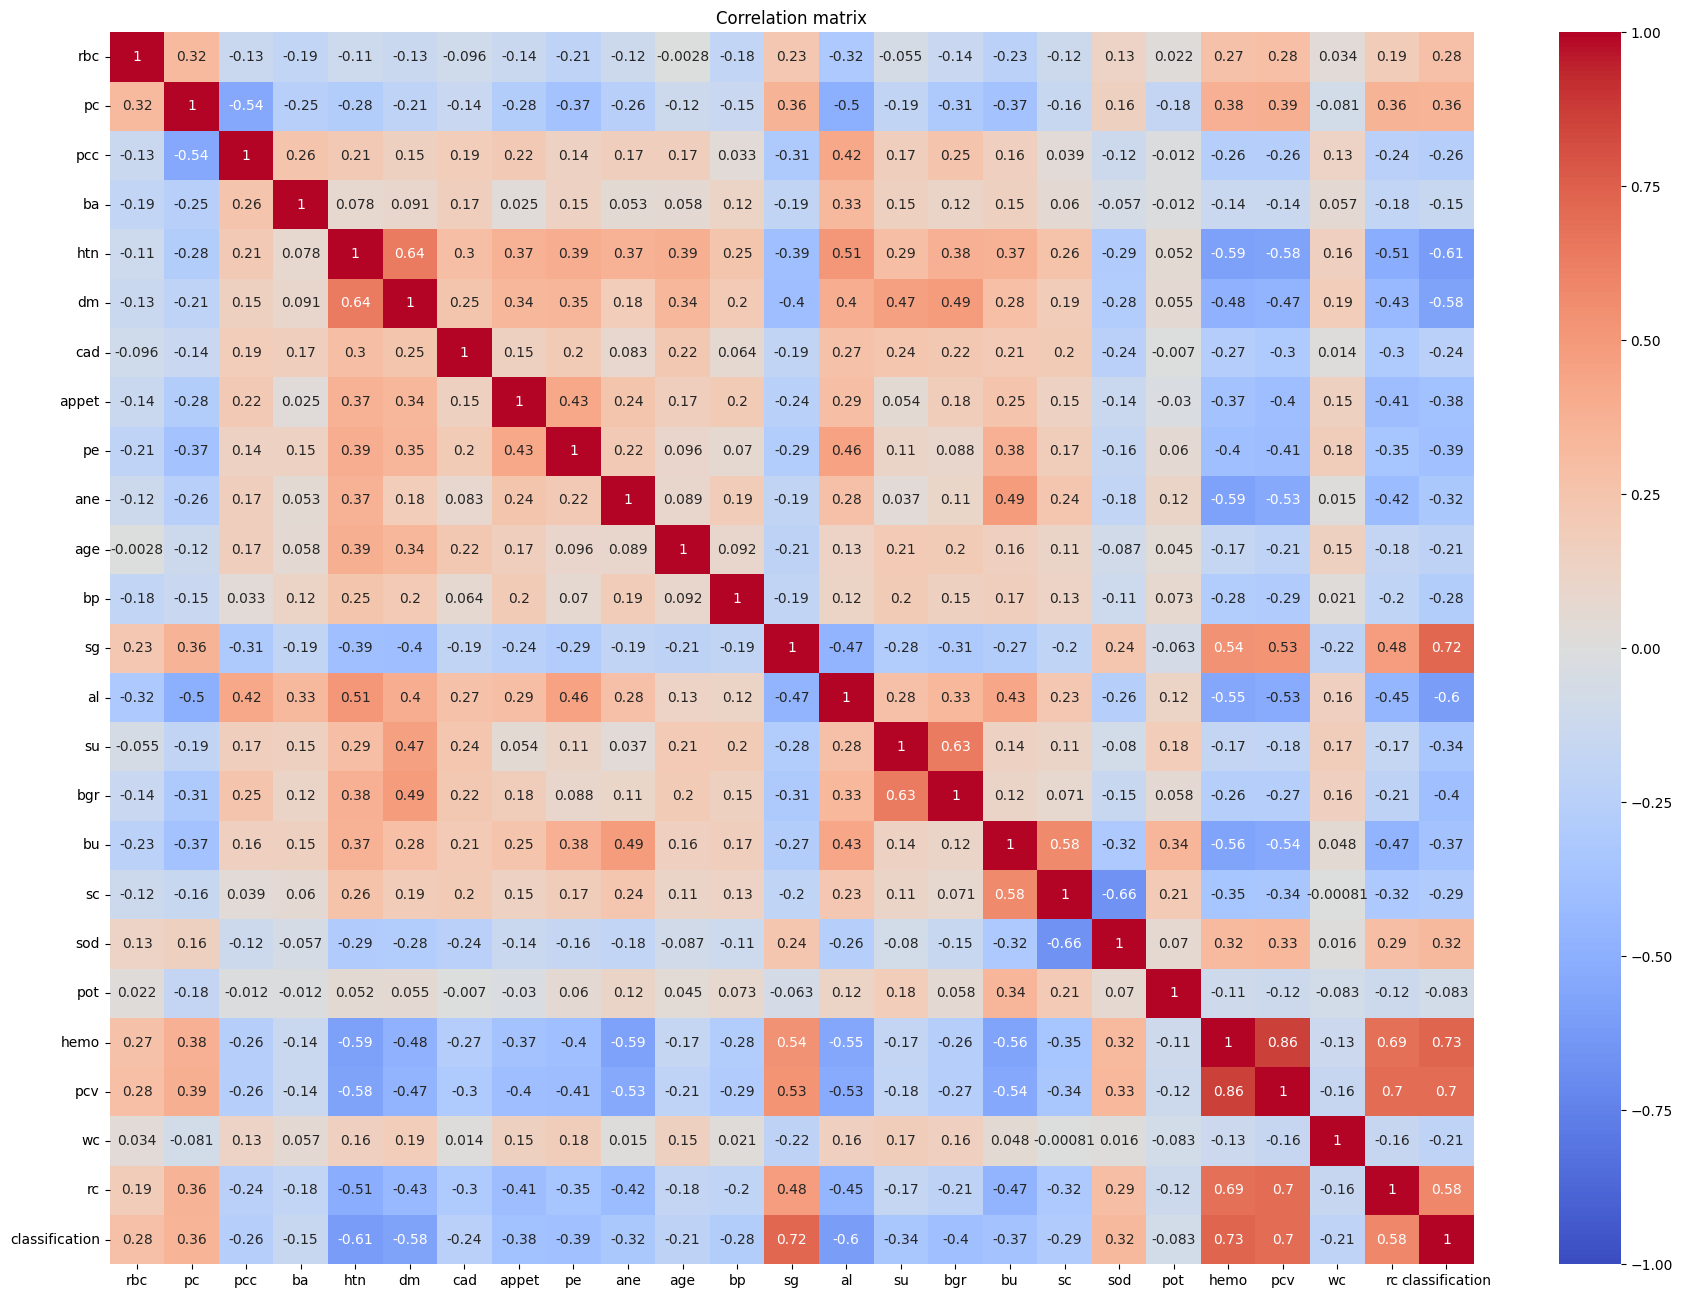

In [15]:
preprocessed_train_df = pd.concat([X_train_transformed, y_train], axis=1)
corr_matrix = preprocessed_train_df.corr()

plt.figure(figsize=(22,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()